In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("loanP_train.csv")

In [2]:
df.head()

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,578.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,84.596463,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,126.500000,360.000000,1.00000
75%,5807.500000,2279.000000,165.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


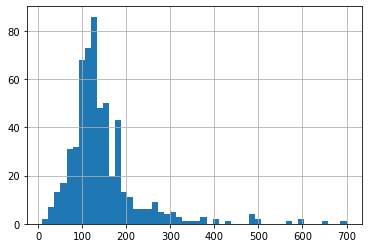

In [4]:
df['LoanAmount'].hist(bins=50)

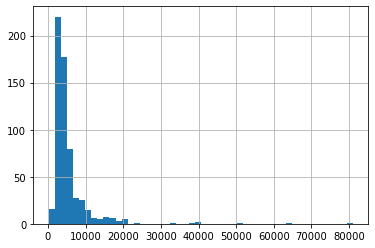

In [5]:
df['ApplicantIncome'].hist(bins=50)

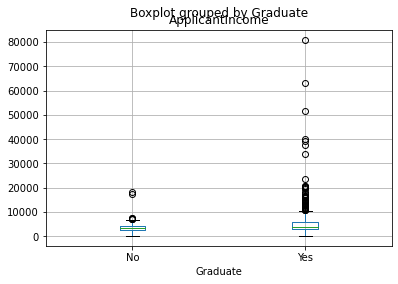

In [21]:
df.boxplot(column='ApplicantIncome', by = 'Graduate')

In [22]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     88
1.0    462
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.079545
1.0                0.792208


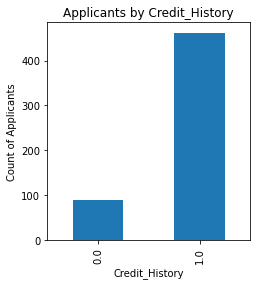

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

In [9]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
#filling missing values with the mean

In [11]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
#fill in more missing values
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [26]:
df.mean()

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.mean()

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

In [14]:
#Begin Machine Learning Exercise
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [27]:
#Extracting only the independent variables
X = df.iloc[:, [8,10]].values #credit history and loan amount

#Extracting only the dependent variables
y = df.iloc[:, 12].values #Loan status

In [28]:
#Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#if test_size is 0.25 then the train size will be 0.75, normal for the training set to be 3-4x larger than the test set.
#random_state makes sure that the data is sorted ramdomly
#x_train and x_test and y_train etc are setting up dataframe variables for the test and train set

In [33]:
#Feature scaling, normalizes the data so the extreme outliers do not skew the data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
#Use logistic regression since the dependent variable is binary
#fit it to the training set, create an instance called classifier, 
#calling fit method trains the variable according to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [36]:
 #Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 18,  27],
       [  2, 103]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066666666666666